In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [8]:
housing = pd.read_csv('UCI_Credit_Card.csv')
housing.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


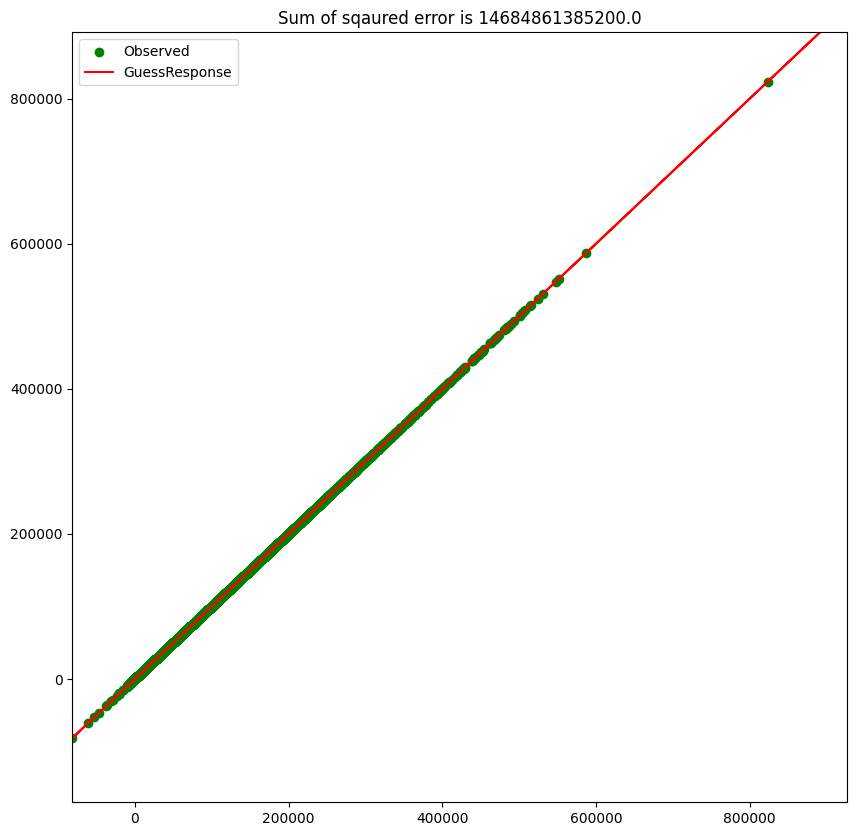

In [11]:
# lets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['BILL_AMT5']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observederror'] = housing['BILL_AMT4'] - housing['GuessResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['BILL_AMT5'], housing['BILL_AMT5'], color='g', label='Observed')
plt.plot(housing['BILL_AMT5'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['BILL_AMT5'].min()-2, housing['BILL_AMT5'].max()+2)
plt.ylim(housing['BILL_AMT4'].min()-2, housing['BILL_AMT4'].max()+2)
plt.show()